In [1]:
! pip install numpy opencv-python scikit-image


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


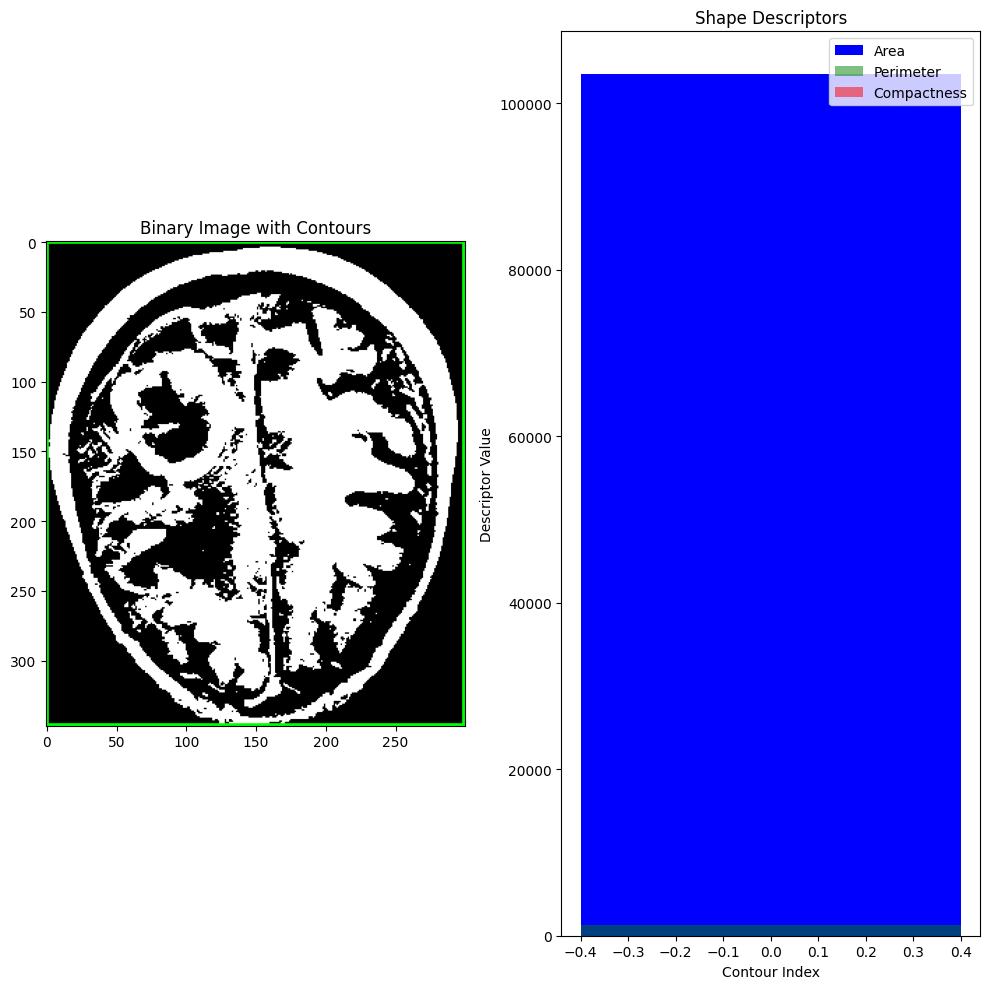

In [2]:
import cv2
import numpy as np
from skimage import measure, color
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load and preprocess the MRI image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return binary_image

def extract_contours(binary_image):
    """Extract contours from the binary image."""
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def compute_shape_descriptors(contours):
    """Compute shape descriptors for each contour."""
    descriptors = []
    for contour in contours:
        # Compute contour area
        area = cv2.contourArea(contour)

        # Compute perimeter
        perimeter = cv2.arcLength(contour, True)

        # Compute compactness
        if perimeter > 0:
            compactness = 4 * np.pi * (area / (perimeter ** 2))
        else:
            compactness = 0

        # Store descriptors
        descriptors.append({
            'area': area,
            'perimeter': perimeter,
            'compactness': compactness
        })
    
    return descriptors

def display_results(binary_image, contours, descriptors):
    """Display the binary image and contours."""
    contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title("Binary Image with Contours")
    plt.imshow(contour_image)
    
    plt.subplot(1, 2, 2)
    plt.title("Shape Descriptors")
    plt.bar(range(len(descriptors)), [d['area'] for d in descriptors], color='b', label='Area')
    plt.bar(range(len(descriptors)), [d['perimeter'] for d in descriptors], color='g', label='Perimeter', alpha=0.5)
    plt.bar(range(len(descriptors)), [d['compactness'] for d in descriptors], color='r', label='Compactness', alpha=0.5)
    plt.legend()
    plt.xlabel('Contour Index')
    plt.ylabel('Descriptor Value')
    
    plt.tight_layout()
    plt.show()

def main(image_path):
    """Main function to execute the feature extraction."""
    binary_image = load_image(image_path)
    contours = extract_contours(binary_image)
    descriptors = compute_shape_descriptors(contours)
    display_results(binary_image, contours, descriptors)

# Example usage
if __name__ == "__main__":
    main("C:/Users/desai/OneDrive/Desktop/M.Tech Projects/Dataset/yes/y8.jpg")
